<a href="https://colab.research.google.com/github/z-guard/analysis/blob/main/notebooks/all_town_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 町の全スコア
- input:
    - population_master.csv
        - 町丁ごとの位置
    - train_station.csv
        - 最寄り駅
        - 最寄り駅から主要駅までの時間
    - childcare_score.csv
        - 子育てスコア
            - 保育園スコア
            - 幼稚園スコア
            - 児童館スコア
    - education_score.csv
        - 教育スコア
            - 小学校スコア
            - 中学校スコア
            - 図書館スコア
    - convenience_score.csv
        - 利便性スコア
            - 買い物スコア
            - 駅スコア
    - environment_score.csv
        - 周辺環境スコア
            - 公園スコア
            - 運動場スコア
            - 体育館スコア
            - プールスコア
    - medical_score.csv
        - 医療スコア
            - 病院スコア
            - 小児科スコア
            - 薬局スコア
    - crime_score.csv
        - 治安スコア
    - population_core.csv
        - ○○割合スコア
    - land_price_score.csv
        - 家賃
- output:
    - all_town_score.csv
        - 町丁ごとの全スコアデータ

In [163]:
!pip install -q japanize-matplotlib

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
DIR_NAME = '/content/drive/MyDrive/z-gard/data'

In [166]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [167]:
output_file = 'all_town_score.csv'

### 人口マスタ

In [168]:
df_population = pd.read_csv(os.path.join(DIR_NAME, 'population_master.csv'))[[
    'town_id', '市区町村名', '町名', '町丁目', '対象'
]].set_index('town_id')
print(df_population.shape)
df_population.head()

(3145, 4)


,市区町村名,町名,町丁目,対象
town_id,,,,
101003,千代田区,丸の内,丸の内１丁目,0
101004,千代田区,丸の内,丸の内２丁目,0
101005,千代田区,丸の内,丸の内３丁目,0
101007,千代田区,大手町,大手町１丁目,0
101008,千代田区,大手町,大手町２丁目,0


### 地理マスタ

In [169]:
df_geo_master = pd.read_csv(os.path.join(DIR_NAME, 'geocoding.csv'))[[
    'town_id', '緯度', '経度'
]].set_index('town_id')
print(df_geo_master.shape)
df_geo_master.head()

(3145, 2)


,緯度,経度
town_id,,
101003,35.681560,139.767201
101004,35.680022,139.763447
101005,35.676952,139.763476
101007,35.688069,139.763929
101008,35.686301,139.768087


### 最寄り駅

In [170]:
major_station = ['東京駅', '上野駅', '池袋駅', '新宿駅', '渋谷駅', '品川駅']
df_train_station = pd.read_csv(os.path.join(DIR_NAME, 'train_station_route.csv'))[
    ['no', 'name'] + major_station
].rename(columns={'no':'town_id', 'name':'最寄り駅'}).set_index('town_id')
print(df_train_station.shape)

(3141, 7)


In [171]:
# 最寄り駅と目的地が同じ場合に0分になるように補正
for station in major_station:
    offset = df_train_station[df_train_station['最寄り駅'] == station].iloc[0][station]
    print(station, offset)
    df_train_station[station] = df_train_station[station] - offset

東京駅 4.0
上野駅 4.0
池袋駅 2.0
新宿駅 2.0
渋谷駅 1.0
品川駅 2.0


In [172]:
df_train_station.head()

,最寄り駅,東京駅,上野駅,池袋駅,新宿駅,渋谷駅,品川駅
town_id,,,,,,,
101003,東京駅,0.0,9.0,19.0,18.0,24.0,13.0
101004,東京駅,0.0,9.0,19.0,18.0,24.0,13.0
101005,有楽町駅,4.0,12.0,24.0,25.0,24.0,13.0
101007,大手町駅,4.0,17.0,18.0,23.0,22.0,21.0
101008,大手町駅,4.0,17.0,18.0,23.0,22.0,21.0


### 子育てスコア

In [173]:
df_childcare = pd.read_csv(os.path.join(DIR_NAME, 'childcare_score.csv'))[[
    'town_id', '保育園スコア', '児童館スコア', '子育てスコア'
]].set_index('town_id')
print(df_childcare.shape)
df_childcare.head()

(3145, 3)


,保育園スコア,児童館スコア,子育てスコア
town_id,,,
101003,0.09,0.17,0.20
101004,0.08,0.05,0.10
101005,0.10,0.05,0.10
101007,0.22,0.10,0.07
101008,0.31,0.38,0.22


### 教育スコア

In [174]:
df_education = pd.read_csv(os.path.join(DIR_NAME, 'education_score.csv')).set_index('town_id')
print(df_education.shape)
df_education.head()

(3145, 7)


,小学校スコア,中学校スコア,幼稚園スコア,学習塾スコア,図書館スコア,書店スコア,教育スコア
town_id,,,,,,,
101003,4.00,2.10,2.60,1.85,0.23,4.74,2.93
101004,3.32,2.10,1.89,1.14,0.36,3.90,2.06
101005,1.41,2.13,1.88,1.47,0.94,4.65,1.54
101007,3.50,2.33,1.37,0.45,1.85,4.87,2.58
101008,4.41,2.12,2.18,0.64,1.54,4.36,3.06


### 利便性スコア

In [175]:
df_convenience = pd.read_csv(os.path.join(DIR_NAME, 'convenience_score.csv'))[[
    'town_id', '買い物スコア', '駅スコア', '飲食店スコア', '利便性スコア', '最寄駅(距離)',
    '銭湯(数)', 'カラオケ(数)', 'ネットカフェ(数)', 'クリーニング(数)', '本DVD(数)',
    '100円ショップ(数)', 'カフェ(数)', 'カフェ(チェーン店)(数)', 'ファストフード(数)', 'レストラン(数)',
    'レストラン(チェーン店)(数)', '飲み屋(数)'
]].set_index('town_id')
print(df_convenience.shape)
df_convenience.head()

(3145, 17)


,買い物スコア,駅スコア,飲食店スコア,利便性スコア,最寄駅(距離),銭湯(数),カラオケ(数),ネットカフェ(数),クリーニング(数),本DVD(数),100円ショップ(数),カフェ(数),カフェ(チェーン店)(数),ファストフード(数),レストラン(数),レストラン(チェーン店)(数),飲み屋(数)
town_id,,,,,,,,,,,,,,,,,
101003,3.58,5.00,4.49,4.77,0.037,0,2,0,0,3,1,8,4,1,22,0,31
101004,2.29,4.88,4.77,4.42,0.359,0,0,0,0,3,1,11,5,2,23,0,36
101005,2.29,4.92,4.84,4.46,0.219,1,2,0,0,2,1,14,5,2,24,0,39
101007,2.28,4.85,4.29,4.18,0.308,1,0,0,1,3,0,8,8,1,18,0,30
101008,3.54,4.66,4.18,4.57,0.447,0,0,0,2,3,0,7,7,1,18,0,25


### 周辺環境スコア

In [176]:
df_environment = pd.read_csv(os.path.join(DIR_NAME, 'environment_score.csv')).set_index('town_id')
print(df_environment.shape)
df_environment.head()

(3145, 6)


,公園スコア,運動場スコア,体育館スコア,プールスコア,フィットネススコア,周辺環境スコア
town_id,,,,,,
101003,1.02,0.52,4.12,4.14,4.61,1.85
101004,0.61,0.26,3.61,3.68,4.61,1.31
101005,0.61,0.14,2.32,3.07,4.91,0.95
101007,1.03,0.47,4.93,4.92,4.91,2.33
101008,1.19,0.95,4.96,4.95,4.61,2.53


### 医療スコア

In [177]:
df_medical = pd.read_csv(os.path.join(DIR_NAME, 'medical_score.csv'))[[
    'town_id', '病院スコア', '小児科スコア', '薬局スコア', '医療スコア'
]].set_index('town_id')
print(df_medical.shape)
df_medical.head()

(3145, 4)


,病院スコア,小児科スコア,薬局スコア,医療スコア
town_id,,,,
101003,3.72,4.59,3.69,4.21
101004,1.30,2.86,1.23,1.66
101005,4.14,3.90,3.55,4.03
101007,4.55,3.00,4.58,4.26
101008,4.32,3.19,4.21,4.08


### 治安防災

In [178]:
df_security = pd.read_csv(os.path.join(DIR_NAME, 'security_score.csv'))[[
    'town_id', '犯罪スコア', '警察スコア', '交通事故スコア', '防災スコア', '治安防災スコア'
]].set_index('town_id')
df_security['治安スコア'] = df_security['治安防災スコア']   # 互換性のため
print(df_security.shape)
df_security.head()

(3145, 6)


,犯罪スコア,警察スコア,交通事故スコア,防災スコア,治安防災スコア,治安スコア
town_id,,,,,,
101003,0.19,4.48,1.74,5,1.53,1.53
101004,1.63,4.99,2.61,5,3.61,3.61
101005,1.09,4.99,0.99,5,2.09,2.09
101007,0.08,1.78,0.26,5,0.09,0.09
101008,1.29,0.00,0.78,5,0.29,0.29


### 人口分布

In [179]:
df_pop_rate = pd.read_csv(os.path.join(DIR_NAME, 'population_score.csv'))[[
    'town_id', '乳幼児割合スコア', '小学生割合スコア', '中学生割合スコア', '高校生割合スコア', 
    '10代割合スコア', '20代割合スコア', '30代割合スコア', '40代割合スコア', '50代割合スコア', '60代割合スコア', 
    '10代_子割合スコア', '20代_子割合スコア', '30代_子割合スコア', '40代_子割合スコア', '50代_子割合スコア',
]].set_index('town_id')
print(df_pop_rate.shape)
df_pop_rate.head()

(3145, 15)


,乳幼児割合スコア,小学生割合スコア,中学生割合スコア,高校生割合スコア,10代割合スコア,20代割合スコア,30代割合スコア,40代割合スコア,50代割合スコア,60代割合スコア,10代_子割合スコア,20代_子割合スコア,30代_子割合スコア,40代_子割合スコア,50代_子割合スコア
town_id,,,,,,,,,,,,,,,
101003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 家賃

In [180]:
df_rent_price = pd.read_csv(os.path.join(DIR_NAME, 'land_price_score.csv'))\
    .rename(columns={'地域ID': 'town_id'}).drop(columns=['地価', '地価スコア']).set_index('town_id')
print(df_rent_price.shape)
df_rent_price.head()

(3145, 4)


,家賃予測_ワンルーム,家賃予測_1K,家賃予測_1LDK,家賃予測_2LDK
town_id,,,,
101003,13.31,13.74,29.27,45.23
101004,13.56,13.98,29.98,46.38
101005,13.01,13.45,28.43,43.89
101007,12.52,12.99,27.09,41.73
101008,13.13,13.57,28.79,44.46


### 町の特徴量

In [181]:
df_town_feature = pd.read_csv(os.path.join(DIR_NAME, 'town_feature.csv')).set_index('town_id')
print(df_town_feature.shape)
df_town_feature.head()

(3145, 19)


,閑静スコア,繁華街スコア,団地スコア,戸建スコア,低層マンションスコア,高層マンションスコア,アパートスコア,おしゃれスコア,歴史文化スコア,下町スコア,川スコア,駅近スコア,商店街スコア,散歩道スコア,賑やかスコア,静かスコア,学生スコア,賃貸スコア,購入スコア
town_id,,,,,,,,,,,,,,,,,,,
101003,0.77,3.37,0.69,1.62,0.37,2.33,2.01,0.44,3.30,2.10,0.50,3.84,2.14,0.25,2.89,0.10,2.06,0.3,1.41
101004,0.65,3.24,0.69,1.62,0.37,2.33,2.01,0.44,3.33,2.14,0.42,3.88,2.54,0.25,3.07,0.08,1.78,0.3,1.41
101005,0.78,3.39,0.69,1.62,0.37,2.32,2.02,0.64,2.93,2.93,0.45,3.93,2.57,0.24,3.11,0.07,1.54,0.3,1.41
101007,0.63,3.25,0.69,1.62,0.37,2.31,2.03,0.40,4.23,3.58,0.39,3.64,1.28,0.24,2.95,0.10,1.77,0.3,1.41
101008,0.62,3.02,0.69,1.62,0.37,2.32,2.02,0.35,4.19,2.89,0.48,3.46,1.22,0.24,2.87,0.15,2.10,0.3,1.41


### 各種教室

In [182]:
df_lesson_score = pd.read_csv(os.path.join(DIR_NAME, 'lesson_score.csv')).set_index('town_id')
print(df_lesson_score.shape)
df_lesson_score.head()

(3145, 4)


,音楽教室(数),英語教室(数),プログラミング(数),囲碁将棋(数)
town_id,,,,
101003,0,0,0,0
101004,0,0,0,0
101005,0,0,0,0
101007,0,2,0,0
101008,0,2,0,0


In [183]:
df_fitness_score = pd.read_csv(os.path.join(DIR_NAME, 'fitness_score.csv')).set_index('town_id')
print(df_fitness_score.shape)
df_fitness_score.head()

(3145, 5)


,ダンス教室(数),フィットネス(数),テニス教室(数),ゴルフ練習場(数),スポーツ教室(数)
town_id,,,,,
101003,0,3,0,1,1
101004,0,3,0,1,1
101005,1,5,0,2,3
101007,0,5,0,2,2
101008,0,3,0,1,0


### 全て結合

In [184]:
df_all_town_score = pd.concat([
    df_population,
    df_geo_master,
    df_train_station,
    df_childcare,
    df_education,
    df_convenience,
    df_environment,
    df_medical,
    df_security,
    df_pop_rate,
    df_rent_price,
    df_town_feature,
    df_lesson_score,
    df_fitness_score
], axis=1)
df_all_town_score.index.name = 'town_id'
print(df_all_town_score.shape)

(3145, 103)


In [185]:
score_cols = [col for col in df_all_town_score.columns if col.endswith('スコア')]
print(len(score_cols))

64


In [186]:
# 自宅から主要駅までの時間を計算(徒歩1分＝80m)
for station in major_station:
    df_all_town_score[station] = (df_all_town_score[station] + df_all_town_score['最寄駅(距離)'] * 1000 / 80 + 0.5).round()
df_all_town_score = df_all_town_score.drop(columns=['最寄駅(距離)'])

In [187]:
# データがないところは、0で埋める
for col in score_cols:
    df_all_town_score[col] = df_all_town_score[col].fillna(0)

In [188]:
list(df_all_town_score.columns)

['市区町村名',
 '町名',
 '町丁目',
 '対象',
 '緯度',
 '経度',
 '最寄り駅',
 '東京駅',
 '上野駅',
 '池袋駅',
 '新宿駅',
 '渋谷駅',
 '品川駅',
 '保育園スコア',
 '児童館スコア',
 '子育てスコア',
 '小学校スコア',
 '中学校スコア',
 '幼稚園スコア',
 '学習塾スコア',
 '図書館スコア',
 '書店スコア',
 '教育スコア',
 '買い物スコア',
 '駅スコア',
 '飲食店スコア',
 '利便性スコア',
 '銭湯(数)',
 'カラオケ(数)',
 'ネットカフェ(数)',
 'クリーニング(数)',
 '本DVD(数)',
 '100円ショップ(数)',
 'カフェ(数)',
 'カフェ(チェーン店)(数)',
 'ファストフード(数)',
 'レストラン(数)',
 'レストラン(チェーン店)(数)',
 '飲み屋(数)',
 '公園スコア',
 '運動場スコア',
 '体育館スコア',
 'プールスコア',
 'フィットネススコア',
 '周辺環境スコア',
 '病院スコア',
 '小児科スコア',
 '薬局スコア',
 '医療スコア',
 '犯罪スコア',
 '警察スコア',
 '交通事故スコア',
 '防災スコア',
 '治安防災スコア',
 '治安スコア',
 '乳幼児割合スコア',
 '小学生割合スコア',
 '中学生割合スコア',
 '高校生割合スコア',
 '10代割合スコア',
 '20代割合スコア',
 '30代割合スコア',
 '40代割合スコア',
 '50代割合スコア',
 '60代割合スコア',
 '10代_子割合スコア',
 '20代_子割合スコア',
 '30代_子割合スコア',
 '40代_子割合スコア',
 '50代_子割合スコア',
 '家賃予測_ワンルーム',
 '家賃予測_1K',
 '家賃予測_1LDK',
 '家賃予測_2LDK',
 '閑静スコア',
 '繁華街スコア',
 '団地スコア',
 '戸建スコア',
 '低層マンションスコア',
 '高層マンションスコア',
 'アパートスコア',
 'おしゃれスコア',
 '歴史文化スコア',
 '下町スコア',
 '川スコア',
 '駅近スコア',
 '商店街スコア',


### 出力

In [189]:
df_all_town_score.to_csv(os.path.join(DIR_NAME, output_file), index=True, encoding='utf-8_sig')

### ウェイト設定

In [190]:
# デフォルト値
w_list = {
    '保育園': 9, '幼稚園': 2, '児童館': 6,
    '小学校': 7, '中学校': 5, '図書館': 4,
    '買い物': 8, '駅': 4,
    '公園': 7, '体育館': 3, 'プール': 2, '運動場': 1,
    '病院': 5, '小児科': 9, '薬局': 3,
    '治安防災': 7,
}
age = 20
family = 3
rent = 15

In [191]:
# 家族構成と年代から人口割合のウェイトを設定
def set_pop_rate_from_family_age(family, age, val):
    for a in range(10, 60, 10):
        w_list[f'{a}代割合'] = 0
        w_list[f'{a}代_子割合'] = 0
    
    pop_rate_list = []
    col_name = f'{age}代割合'
    w_list[col_name] = val       # 親の重みづけ
    pop_rate_list.append(col_name)
    if family == 3:
        col_name = f'{age}代_子割合'
        w_list[col_name] = val   # 子供の重みづけ
        pop_rate_list.append(col_name)

    return [col + 'スコア' for col in pop_rate_list]

# 家族構成と年代から部屋タイプを取得
def get_room_type_from_family_age(family, age):
    room_type = {
        10: {1:'ワンルーム', 2:'1K', 3:'1K'},
        20: {1:'ワンルーム', 2:'1K', 3:'1LDK'},
        30: {1:'1K', 2:'1LDK', 3:'2LDK'},
        40: {1:'1K', 2:'1LDK', 3:'2LDK'},
    }
    return f'家賃予測_{room_type[age][family]}'

In [192]:
def weight_setting(保育園, 幼稚園, 児童館, 小学校, 中学校, 図書館, 買い物, 駅, 
                   公園, 体育館, プール, 運動場, 病院, 小児科, 薬局, 治安防災,
                   年代, 家族構成, 家賃):
    w_list['保育園'] = 保育園
    w_list['幼稚園'] = 幼稚園
    w_list['児童館'] = 児童館
    w_list['小学校'] = 小学校
    w_list['中学校'] = 中学校
    w_list['図書館'] = 図書館
    w_list['買い物'] = 買い物
    w_list['駅'] = 駅
    w_list['公園'] = 公園
    w_list['体育館'] = 体育館
    w_list['プール'] = プール
    w_list['運動場'] = 運動場
    w_list['病院'] = 病院
    w_list['小児科'] = 小児科
    w_list['薬局'] = 薬局
    w_list['治安防災'] = 治安防災
    age = 年代
    family = 家族構成
    rent = 家賃


### 重みづけを変えて、ランキングを表示
1. 保育園
1. 幼稚園
1. 児童館
1. 小学校
1. 中学校
1. 図書館
1. 買い物
1. 駅
1. 公園
1. 体育館
1. プール
1. 運動場
1. 病院
1. 小児科
1. 薬局
1. 治安
1. 年代(10代, 20代, 30代, 40代, 50代)
1. 家族構成(1:独身, 2:夫婦, 3:夫婦+子)
1. 家賃(-10, -15, -20, -25, -30, 30-)

In [193]:
from ipywidgets import interact
import ipywidgets as widgets

In [194]:
interact(
    weight_setting, 
    保育園=widgets.IntSlider(min=0, max=9, step=1, value=w_list['保育園']),
    幼稚園=widgets.IntSlider(min=0, max=9, step=1, value=w_list['幼稚園']), 
    児童館=widgets.IntSlider(min=0, max=9, step=1, value=w_list['児童館']),
    小学校=widgets.IntSlider(min=0, max=9, step=1, value=w_list['小学校']),
    中学校=widgets.IntSlider(min=0, max=9, step=1, value=w_list['中学校']),
    図書館=widgets.IntSlider(min=0, max=9, step=1, value=w_list['図書館']),
    買い物=widgets.IntSlider(min=0, max=9, step=1, value=w_list['買い物']),
    駅=widgets.IntSlider(min=0, max=9, step=1, value=w_list['駅']),
    公園=widgets.IntSlider(min=0, max=9, step=1, value=w_list['公園']),
    体育館=widgets.IntSlider(min=0, max=9, step=1, value=w_list['体育館']),
    プール=widgets.IntSlider(min=0, max=9, step=1, value=w_list['プール']),
    運動場=widgets.IntSlider(min=0, max=9, step=1, value=w_list['運動場']),
    病院=widgets.IntSlider(min=0, max=9, step=1, value=w_list['病院']),
    小児科=widgets.IntSlider(min=0, max=9, step=1, value=w_list['小児科']),
    薬局=widgets.IntSlider(min=0, max=9, step=1, value=w_list['薬局']),
    治安防災=widgets.IntSlider(min=0, max=9, step=1, value=w_list['治安防災']),
    年代=widgets.Dropdown(options=[('10代', 10), ('20代', 20), ('30代', 30), ('40代', 40), ('50代', 50)], value=age),
    家族構成=widgets.Dropdown(options=[('独身', 1), ('夫婦', 2), ('夫婦+子', 3)], value=family),
    家賃=widgets.Dropdown(options=[('~10万', 10), ('~15万', 15), ('~20万', 20), ('~25万', 25), ('25万~', 100), ('制限なし', 1000)], value=rent),
);

interactive(children=(IntSlider(value=9, description='保育園', max=9), IntSlider(value=2, description='幼稚園', max=…

In [195]:
max_weight = max(w_list.values())
print(max_weight)

9


In [196]:
pop_rate_list = set_pop_rate_from_family_age(family, age, max_weight)
print(pop_rate_list)
room_type = get_room_type_from_family_age(family, age)
print(room_type)

['20代割合スコア', '20代_子割合スコア']
家賃予測_1LDK


In [197]:
new_weight = {}
for k, v in w_list.items():
    new_weight[k] = round(v / max_weight * 5, 2)

new_weight

{'保育園': 5.0,
 '幼稚園': 1.11,
 '児童館': 3.33,
 '小学校': 3.89,
 '中学校': 2.78,
 '図書館': 2.22,
 '買い物': 4.44,
 '駅': 2.22,
 '公園': 3.89,
 '体育館': 1.67,
 'プール': 1.11,
 '運動場': 0.56,
 '病院': 2.78,
 '小児科': 5.0,
 '薬局': 1.67,
 '治安防災': 3.89,
 '10代割合': 0.0,
 '10代_子割合': 0.0,
 '20代割合': 5.0,
 '20代_子割合': 5.0,
 '30代割合': 0.0,
 '30代_子割合': 0.0,
 '40代割合': 0.0,
 '40代_子割合': 0.0,
 '50代割合': 0.0,
 '50代_子割合': 0.0}

In [198]:
# 家賃でフィルタ
df_my_town_score = df_all_town_score[
    df_all_town_score[room_type] < (rent * 1.2)
].reset_index()

In [199]:
total_weight = sum(new_weight.values())
print(f'total_weight: {total_weight:.2f}')

for key, val in new_weight.items():
    print(key)
    df_my_town_score[key] = df_my_town_score[f'{key}スコア'].apply(lambda x: min(x, val))

total_weight: 55.56
保育園
幼稚園
児童館
小学校
中学校
図書館
買い物
駅
公園
体育館
プール
運動場
病院
小児科
薬局
治安防災
10代割合
10代_子割合
20代割合
20代_子割合
30代割合
30代_子割合
40代割合
40代_子割合
50代割合
50代_子割合


In [200]:
df_my_town_score['matching_score'] = df_my_town_score[new_weight.keys()].sum(axis=1) / total_weight * 100
print(f"max matching_score: {df_my_town_score['matching_score'].max():.2f}", )

max matching_score: 92.40


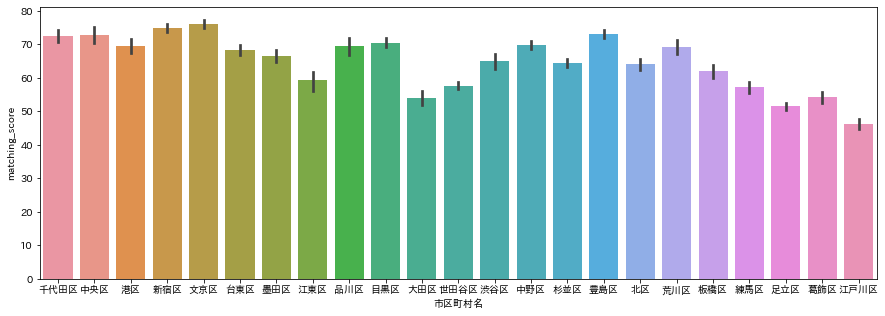

In [201]:
plt.figure(figsize=(15, 5))
sns.barplot(x='市区町村名', y='matching_score', data=df_my_town_score)
plt.show()

In [202]:
df_my_town_score['rank'] = df_my_town_score.groupby('町名')['matching_score'].transform('rank', ascending=False)
df_ranking = df_my_town_score[df_my_town_score['rank'] == 1].sort_values('matching_score', ascending=False)[
    ['town_id', '市区町村名', '町丁目', '最寄り駅', 'matching_score',
     '子育てスコア', '教育スコア', '利便性スコア', '周辺環境スコア', '医療スコア', '治安防災スコア', room_type] + pop_rate_list
].reset_index(drop=True)
print(df_ranking.shape)

(868, 14)


In [203]:
df_ranking.head(10)

,town_id,市区町村名,町丁目,最寄り駅,matching_score,子育てスコア,教育スコア,利便性スコア,周辺環境スコア,医療スコア,治安防災スコア,家賃予測_1LDK,20代割合スコア,20代_子割合スコア
0,101141,千代田区,神田佐久間町４丁目,浅草橋駅,92.404608,4.04,4.10,4.43,4.96,4.56,4.22,14.28,4.92,4.96
1,107022,墨田区,菊川１丁目,両国駅,90.388769,4.03,4.04,4.14,4.70,4.29,3.23,10.72,4.15,3.70
2,109126,品川区,西中延１丁目,荏原中延駅,89.290857,4.79,4.61,3.46,4.22,4.20,4.11,10.20,3.01,3.24
3,104067,新宿区,西五軒町,飯田橋駅,89.218862,4.99,4.91,4.11,2.56,4.37,4.96,13.03,3.46,2.63
4,102027,中央区,明石町,八丁堀駅,88.696904,4.61,3.56,4.04,3.53,4.29,3.25,14.71,4.04,3.94
5,104066,新宿区,東五軒町,飯田橋駅,88.228942,5.00,4.87,4.31,3.57,2.91,4.78,13.03,2.91,4.06
6,104085,新宿区,筑土八幡町,飯田橋駅,87.886969,4.81,4.16,4.93,4.19,3.66,4.82,16.46,4.88,4.00
7,102031,中央区,築地３丁目,八丁堀駅,87.868970,4.63,4.19,4.05,4.14,4.39,3.63,13.34,4.43,1.81
8,104092,新宿区,天神町,飯田橋駅,87.814975,4.69,4.75,4.72,3.24,4.65,3.87,13.03,4.45,0.89
9,104103,新宿区,築地町,飯田橋駅,87.652988,4.46,4.94,4.47,2.70,4.57,3.92,13.03,3.99,2.23


In [204]:
df_ranking['rank'] = df_ranking.groupby('最寄り駅')['matching_score'].transform('rank', ascending=False)
df_ranking_2 = df_ranking[df_ranking['rank'] == 1].sort_values('matching_score', ascending=False).drop(columns=['rank']).reset_index(drop=True)
print(df_ranking_2.shape)

(264, 14)


In [205]:
df_ranking_2.head(10)

,town_id,市区町村名,町丁目,最寄り駅,matching_score,子育てスコア,教育スコア,利便性スコア,周辺環境スコア,医療スコア,治安防災スコア,家賃予測_1LDK,20代割合スコア,20代_子割合スコア
0,101141,千代田区,神田佐久間町４丁目,浅草橋駅,92.404608,4.04,4.10,4.43,4.96,4.56,4.22,14.28,4.92,4.96
1,107022,墨田区,菊川１丁目,両国駅,90.388769,4.03,4.04,4.14,4.70,4.29,3.23,10.72,4.15,3.70
2,109126,品川区,西中延１丁目,荏原中延駅,89.290857,4.79,4.61,3.46,4.22,4.20,4.11,10.20,3.01,3.24
3,104067,新宿区,西五軒町,飯田橋駅,89.218862,4.99,4.91,4.11,2.56,4.37,4.96,13.03,3.46,2.63
4,102027,中央区,明石町,八丁堀駅,88.696904,4.61,3.56,4.04,3.53,4.29,3.25,14.71,4.04,3.94
5,104095,新宿区,早稲田町,面影橋駅,87.491001,4.96,4.99,3.28,3.12,4.40,4.90,12.15,4.91,1.27
6,102070,中央区,日本橋人形町３丁目,新日本橋駅,87.383009,4.98,4.50,4.68,3.98,4.89,1.61,15.42,4.29,3.26
7,114104,中野区,上鷺宮４丁目,富士見台駅,87.293017,3.18,3.22,3.20,3.67,4.73,4.62,8.21,3.46,3.70
8,120055,練馬区,練馬３丁目,豊島園駅,87.257019,4.22,2.93,2.96,4.30,3.58,3.49,8.25,4.79,2.53
9,105013,文京区,小石川５丁目,巣鴨駅,86.951044,4.45,4.86,3.70,4.20,4.38,3.74,11.89,2.86,4.08


In [206]:
df_ranking_2.tail(10)

,town_id,市区町村名,町丁目,最寄り駅,matching_score,子育てスコア,教育スコア,利便性スコア,周辺環境スコア,医療スコア,治安防災スコア,家賃予測_1LDK,20代割合スコア,20代_子割合スコア
254,111041,大田区,平和島５丁目,流通センター駅,44.906407,0.60,0.08,0.66,0.99,0.11,4.81,7.51,3.06,4.53
255,121301,足立区,六木２丁目,八潮駅,44.762419,0.64,0.53,0.16,1.67,0.23,4.30,5.00,0.15,4.92
256,111186,大田区,羽田旭町,整備場駅,43.880490,0.76,1.01,1.35,0.13,0.20,4.14,8.70,4.64,0.45
257,112265,世田谷区,宇奈根３丁目,久地駅,43.574514,0.26,0.71,0.11,3.11,0.28,4.60,5.91,1.68,3.55
258,109156,品川区,八潮５丁目,品川シーサイド駅,42.404608,0.30,0.96,0.96,1.13,1.04,2.02,7.91,0.86,1.48
259,108084,江東区,有明１丁目,有明テニスの森駅,32.163427,0.27,0.17,1.39,0.20,0.26,1.44,10.67,0.33,4.98
260,111200,大田区,羽田空港２丁目,羽田空港第3ターミナル駅,24.388049,0.18,1.53,1.69,0.00,0.18,4.03,9.37,0.00,0.00
261,108188,江東区,新木場４丁目,新木場駅,24.190065,0.00,0.29,0.21,1.16,0.02,4.42,10.19,0.00,0.00
262,109157,品川区,東八潮,東京国際クルーズターミナル駅,21.778258,0.25,0.48,0.71,1.28,0.04,1.57,12.34,0.00,0.00
263,111273,大田区,ふるさとの浜辺公園,NaN,11.375090,0.00,0.00,0.00,0.00,0.00,4.34,6.84,0.00,0.00
